In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# read our data and creates a data frame
df = pd.read_csv('DATA/private.csv')

In [10]:
# reads the data from 'The Economist' and creates a data frame
eco_df = pd.read_csv('DATA/Democracy-Index-2019.csv')

In [11]:
# an orverviews of the data frame
eco_df

,Country,Overall score,Rank,Electoral process,Functioning gov,Political participation,Political culture,Civil liberties
0,Norway,9.87,1,10.00,9.64,10.00,10.00,9.71
1,Iceland,9.58,2,10.00,9.29,8.89,10.00,9.71
2,Sweden,9.39,3,9.58,9.64,8.33,10.00,9.41
3,New Zealand,9.26,4,10.00,9.29,8.89,8.13,10.00
4,Finland,9.25,5,10.00,8.93,8.89,8.75,9.71
...,...,...,...,...,...,...,...,...
162,Chad,1.61,163,0.00,0.00,1.67,3.75,2.65
163,Syria,1.43,164,0.00,0.00,2.78,4.38,0.00
164,Central African Republic,1.32,165,1.25,0.00,1.11,1.88,2.35
165,"Congo, Dem. Rep.",1.13,166,0.00,0.00,1.67,3.13,0.88


In [12]:
# order the data frame by alphabetical order
eco_df=eco_df.sort_values('Country')

In [13]:
# set the index of the data frame to be 'Country'
eco_df.set_index('Country')

,Overall score,Rank,Electoral process,Functioning gov,Political participation,Political culture,Civil liberties
Country,,,,,,,
Afghanistan,2.85,141=,3.42,0.64,3.89,2.50,3.82
Albania,5.89,79,7.00,5.36,4.44,5.00,7.65
Algeria,4.01,113,3.08,2.86,5.00,5.00,4.12
Angola,3.72,119,2.25,2.86,5.56,5.00,2.94
Argentina,7.02,48,9.17,5.36,6.11,6.25,8.24
...,...,...,...,...,...,...,...
Vietnam,3.08,136,0.00,3.21,3.89,5.63,2.65
Yemen,1.95,158,0.00,0.00,3.89,5.00,0.88
Zambia,5.09,97=,4.75,2.93,4.44,6.88,6.47


In [14]:
# Cut the data frame to keep just the name of the country and the democratic score
# save the data frame in a csv file
eco_df=eco_df[['Country', 'Overall score']]

eco_df.to_csv('DATA/DATA_DEMO2.csv')

In [15]:
# creat a copy of the first data frame
df_2 = df.copy()
df_2.set_index('Country')

,Democracy,Expectancy,PopulationD,Gini,AgeMed,Skyscraper,Children,PressF
Country,,,,,,,,
Afghanistan,0,64.1,58.3,36.8,18.4,75.0,4.18,36.55
Albania,0,78.5,105.0,29.0,36.4,91.0,1.70,29.84
Algeria,0,78.1,18.1,27.6,28.5,270.0,2.59,45.75
Angola,0,65.0,25.5,42.6,16.7,145.0,5.48,34.96
Argentina,1,77.0,16.4,42.4,31.5,235.0,2.25,28.30
...,...,...,...,...,...,...,...,...
Venezuela,0,75.1,32.3,46.9,29.6,262.5,2.25,49.10
Vietnam,0,74.7,311.0,35.3,32.5,461.2,1.94,74.93
Yemen,0,68.1,55.2,36.7,20.2,100.0,3.69,61.66


In [16]:
# merge the two data frames together in a new data frame in order to preocess multiregression
DF_multiReg = df_2.merge(eco_df)

In [17]:
scale = StandardScaler()

# parameters
X = DF_multiReg[['Expectancy', 'PopulationD', 'Gini', 'AgeMed','Skyscraper','Children','PressF']]
# target
y = DF_multiReg['Overall score']

# scale the data for the result to be easily interpreted
X[['Expectancy', 'PopulationD', 'Gini', 'AgeMed','Skyscraper','Children','PressF']] = scale.fit_transform(X[['Expectancy', 'PopulationD', 'Gini', 'AgeMed','Skyscraper','Children','PressF']].values)

#print (X)

# uses ordinary least squares method to compare the parameters' influence.
est = sm.OLS(y, X).fit()

est.summary()

<ipython-input-17-2f5021ba492f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Expectancy', 'PopulationD', 'Gini', 'AgeMed','Skyscraper','Children','PressF']] = scale.fit_transform(X[['Expectancy', 'PopulationD', 'Gini', 'AgeMed','Skyscraper','Children','PressF']].values)
/home/vinz/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/home/vinz/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A val

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Overall score   R-squared (uncentered):                   0.117
Model:                            OLS   Adj. R-squared (uncentered):              0.077
Method:                 Least Squares   F-statistic:                              2.901
Date:                Mon, 16 Nov 2020   Prob (F-statistic):                     0.00708
Time:                        17:17:43   Log-Likelihood:                         -500.81
No. Observations:                 160   AIC:                                      1016.
Df Residuals:                     153   BIC:                                      1037.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Expectancy      0.4200      0.845      0.497      0.620      -1.250       2.090
PopulationD    -0.0263      0.475     -0.055      0.956      -0.965       0.913
Gini            0.1255      0.545      0.230      0.818      -0.951       1.202
AgeMed          0.2909      1.181      0.246      0.806      -2.042       2.624
Skyscraper      0.0410      0.532      0.077      0.939      -1.010       1.092
Children       -0.2865      1.033     -0.277      0.782      -2.327       1.754
PressF         -1.5629      0.532     -2.940      0.004      -2.613      -0.513
==============================================================================
Omnibus:                        0.750   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.513
Skew:                          -0.131   Prob(JB):                        0.774
Kurtosis:                       3.094   Cond. No.                         5.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to this multi regression, the press freedom (PressF) is the most important parameter to predict the regime of a country. Following by the age expectancy and the median age. 

In [18]:
DF = DF_multiReg.copy()

# groups country according to their democratic score (the Economist criteria):
# 1 : full democratie 8 =< score < 10
# 2 : flawed democracy 6 =< score < 8
# 3 : hybrid regime 4 =< score < 6
# 4 : authoritarian regime 0 =< score < 4
conditions = [
      DF['Overall score'] >= 8,
      (DF['Overall score'] >= 6) & (DF['Overall score'] < 8),
      (DF['Overall score'] >= 4) & (DF['Overall score'] < 6),
      DF['Overall score'] < 4
      ]
values = [1, 2, 3, 4]
DF['Group']=np.select(conditions,values)



In [19]:
# an overview of the data frame
DF

,Country,Democracy,Expectancy,PopulationD,Gini,AgeMed,Skyscraper,Children,PressF,Overall score,Group
0,Afghanistan,0,64.1,58.3,36.8,18.4,75.0,4.18,36.55,2.85,4
1,Albania,0,78.5,105.0,29.0,36.4,91.0,1.70,29.84,5.89,3
2,Algeria,0,78.1,18.1,27.6,28.5,270.0,2.59,45.75,4.01,3
3,Angola,0,65.0,25.5,42.6,16.7,145.0,5.48,34.96,3.72,4
4,Argentina,1,77.0,16.4,42.4,31.5,235.0,2.25,28.30,7.02,2
...,...,...,...,...,...,...,...,...,...,...,...
155,Venezuela,0,75.1,32.3,46.9,29.6,262.5,2.25,49.10,2.88,4
156,Vietnam,0,74.7,311.0,35.3,32.5,461.2,1.94,74.93,3.08,4
157,Yemen,0,68.1,55.2,36.7,20.2,100.0,3.69,61.66,1.95,4
158,Zambia,0,64.0,24.0,57.1,17.6,90.0,4.81,36.38,5.09,3


Draw box plot for each parameter and each group of political regime:
    1 : full democratie 
    2 : flawed democracy 
    3 : hybrid regime
    4 : authoritarian regime   

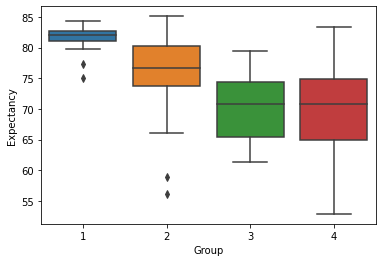

In [165]:
box = sns.boxplot(x='Group', y='Expectancy', data=DF)

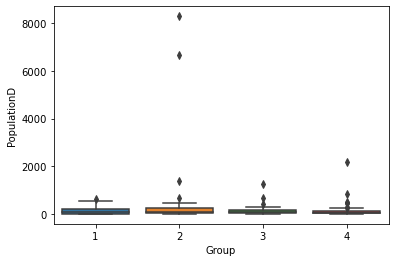

In [166]:
box = sns.boxplot(x='Group', y='PopulationD', data=DF)

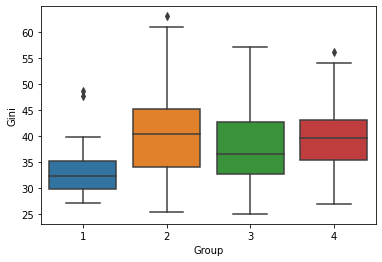

In [167]:
box = sns.boxplot(x='Group', y='Gini', data=DF)

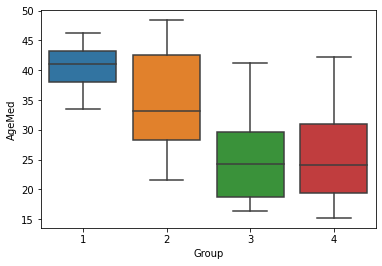

In [168]:
box = sns.boxplot(x='Group', y='AgeMed', data=DF)

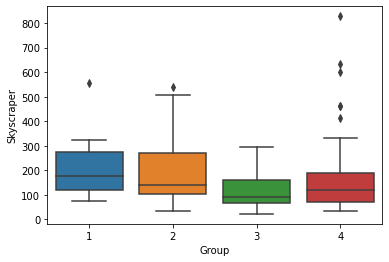

In [169]:
box = sns.boxplot(x='Group', y='Skyscraper', data=DF)

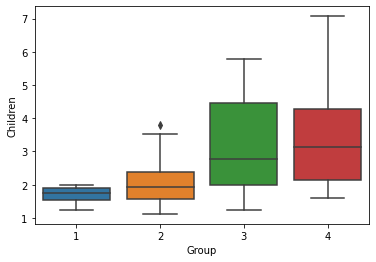

In [170]:
box = sns.boxplot(x='Group', y='Children', data=DF)

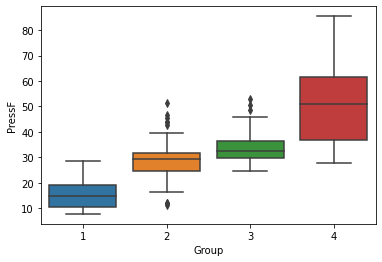

In [171]:
box = sns.boxplot(x='Group', y='PressF', data=DF)